In [1]:
from resnet1d import resnet1d_wang

In [20]:
import torch
import torch.nn as nn

inp = torch.randn(3, 12, 5000)
model = resnet1d_wang(input_channels=12)

In [21]:
embeddings = model(inp)
embeddings.shape

torch.Size([3, 128, 1250])

In [22]:
first_add_on_layer_in_channels = \
        [i for i in model.modules() if isinstance(i, nn.Conv1d)][-1].out_channels

In [23]:
first_add_on_layer_in_channels

128

In [24]:
model.conv_info()

([5, 3, 5, 3, 5, 3], [1, 1, 2, 1, 2, 1], [2, 1, 2, 1, 2, 1])

In [25]:
num_classes = 5
num_prototypes_for_each_class = 1  # MANIPULATE ?
num_prototypes = num_classes * num_prototypes_for_each_class
prototype_shape = (num_prototypes, 128, 1, 1)  # MANIPULATE ?

In [26]:
add_on_layers = nn.Sequential(
                nn.Conv1d(in_channels=first_add_on_layer_in_channels, out_channels=prototype_shape[1], kernel_size=626),
                nn.ReLU(),
                nn.Conv1d(in_channels=prototype_shape[1], out_channels=prototype_shape[1], kernel_size=625),
                nn.Sigmoid()
                )

In [27]:
add_on_layers(embeddings).shape

torch.Size([3, 128, 1])

### Viewing saved prototypes

Loaded data shape: (12, 1000)
Data type: float32


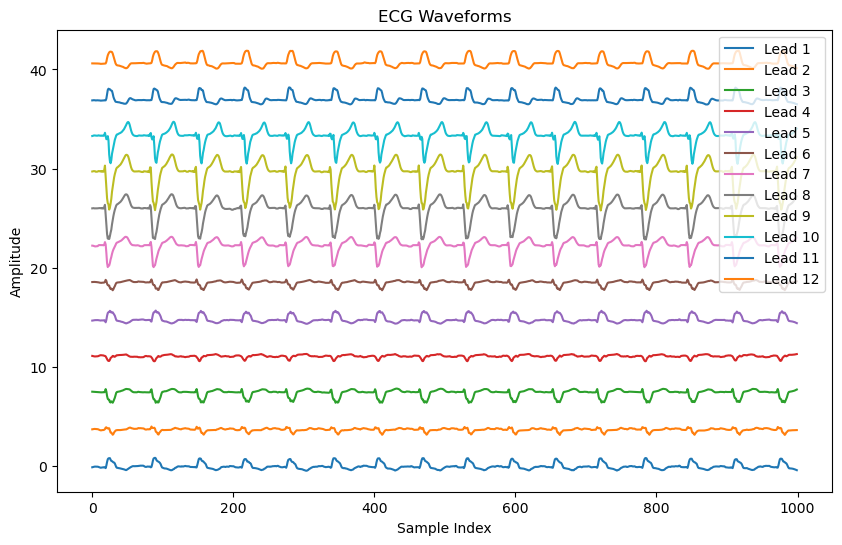

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .dat.npy file
file_path = 'saved_models/1/img/epoch-2/prototype-img0.dat.npy'
ecg_data = np.load(file_path)

# Print the shape and type of the loaded data
print("Loaded data shape:", ecg_data.shape)
print("Data type:", ecg_data.dtype)

# Transpose if needed (depending on your data's orientation)
ecg_data = ecg_data.T  # Uncomment if your data needs transposing

# Check the dimensions
if ecg_data.ndim == 2:
    num_samples, num_channels = ecg_data.shape

    # Create a figure for the ECG leads
    plt.figure(figsize=(10,6))  # Adjust height based on number of leads

    # Plot each lead in a separate horizontal section
    for i in range(num_channels):
        plt.plot(ecg_data[:, i] + i * 3.7, label=f'Lead {i+1}')  # Offset each lead to avoid overlap

    plt.title('ECG Waveforms')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')
    plt.grid(False)  # Turn off gridlines
    plt.show()

elif ecg_data.ndim == 1:
    plt.figure(figsize=(12, 6))
    plt.plot(ecg_data)
    plt.title('ECG Waveform')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid(False)  # Turn off gridlines
    plt.show()

else:
    print("Unsupported data shape.")
